In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from numpy.linalg import inv
import statsmodels.api as sm
import pandas as pd
import re
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/Users/tiziana/Desktop/PYTHON/TESI MAGISTRALE/PCA/DATESET.csv')
df=df.iloc[:, 1:]
df.head()


df.set_index(['Country'],inplace=True)
jpn = pd.DataFrame(df.loc['Japan'])



jpn.reset_index(inplace=True)
jpn=jpn.drop(['Country','Trimestre'],axis=1)

In [3]:
dftest = adfuller(jpn['Gdp growth'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print(f'Gdp growth is Stationary ')
else:
    print('Non stationary')



dftest = adfuller(jpn['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(jpn['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(jpn['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print(f'Financial Index Non stationary')

Gdp growth is Stationary 
Current Account Non stationary
Public Debt Non stationary
Financial Index Non stationary


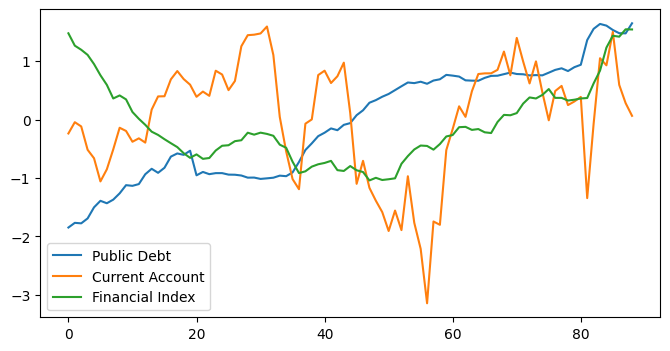

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 4))
plt.plot(jpn['Public Debt'], label='Public Debt')
plt.plot(jpn['Current Account'], label='Current Account')
plt.plot(jpn['Financial index'], label='Financial Index')


plt.legend()

In [5]:
from statsmodels.tsa.api import VAR
model = VAR(jpn)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-4.098,-3.980,0.01661,-4.050
1,-13.23,-12.64*,1.789e-06,-13.00*
2,-13.38*,-12.32,1.548e-06*,-12.96
3,-13.26,-11.73,1.756e-06,-12.65
4,-13.24,-11.23,1.823e-06,-12.43
5,-12.95,-10.46,2.505e-06,-11.95
6,-12.90,-9.946,2.709e-06,-11.72
7,-13.16,-9.730,2.203e-06,-11.78
8,-13.21,-9.313,2.229e-06,-11.65


In [6]:
jpn_coin = jpn.drop('Gdp growth',axis=1)
jpn_coin

,Current Account,Public Debt,Financial index
0,-0.236740,-1.846895,1.478134
1,-0.043673,-1.766813,1.266730
2,-0.116272,-1.775224,1.196341
3,-0.516014,-1.690954,1.108543
4,-0.660900,-1.501175,0.951074
...,...,...,...
84,0.930185,1.609623,1.233342
85,1.502044,1.535020,1.436448
86,0.594642,1.479624,1.420328
87,0.282551,1.477239,1.546678


In [7]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
test = coint_johansen(jpn_coin, det_order=1, k_ar_diff=2)

output = pd.DataFrame([test.lr1],  index=["trace_stat"], columns=['r=0', 'r<=1', 'r<=2'])
print(output.T, '\n')

cvt = pd.DataFrame(test.cvt, index=["r=0", "r<=1", "r<=2"], columns=["90%", "95%", "99%"])
print("Critical values(90%, 95%, 99%) of trace_stat\n", cvt, '\n')

print("Eigenvalues (lambda):\n")
print(test.eig, "\n")

print("Eigenvectors:")
evec = pd.DataFrame(test.evec).T
print(evec)

      trace_stat
r=0    20.299047
r<=1    6.675794
r<=2    1.890684 

Critical values(90%, 95%, 99%) of trace_stat
           90%      95%      99%
r=0   32.0645  35.0116  41.0815
r<=1  16.1619  18.3985  23.1485
r<=2   2.7055   3.8415   6.6349 

Eigenvalues (lambda):

[0.14650016 0.05412118 0.02174479] 

Eigenvectors:
          0         1         2
0  1.256056  3.756746 -0.373200
1  0.438678 -2.132955  0.816568
2  0.251096 -2.286894 -1.446962


In [8]:
jpn['Gdp growth']=jpn['Gdp growth']
jpn['Current Account'] = jpn['Current Account'].diff(1)
jpn['Public Debt'] = jpn['Public Debt'].diff(1)
jpn['Financial index'] = jpn['Financial index'].diff(1)

jpn=jpn.iloc[1:]

In [9]:
dftest = adfuller(jpn['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(jpn['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(jpn['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print('Financial Index Non stationary')

Current Account is Stationary
Public Debt is Stationary
Financial Index is Stationary


In [10]:
from statsmodels.tsa.api import VAR
model = VAR(jpn)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-13.00,-12.88*,2.253e-06,-12.96
1,-13.27*,-12.68,1.722e-06*,-13.03*
2,-13.24,-12.17,1.790e-06,-12.81
3,-13.26,-11.71,1.769e-06,-12.64
4,-13.01,-10.99,2.286e-06,-12.20
5,-12.93,-10.43,2.545e-06,-11.93
6,-13.05,-10.07,2.341e-06,-11.86
7,-12.96,-9.510,2.691e-06,-11.58
8,-12.80,-8.866,3.416e-06,-11.22


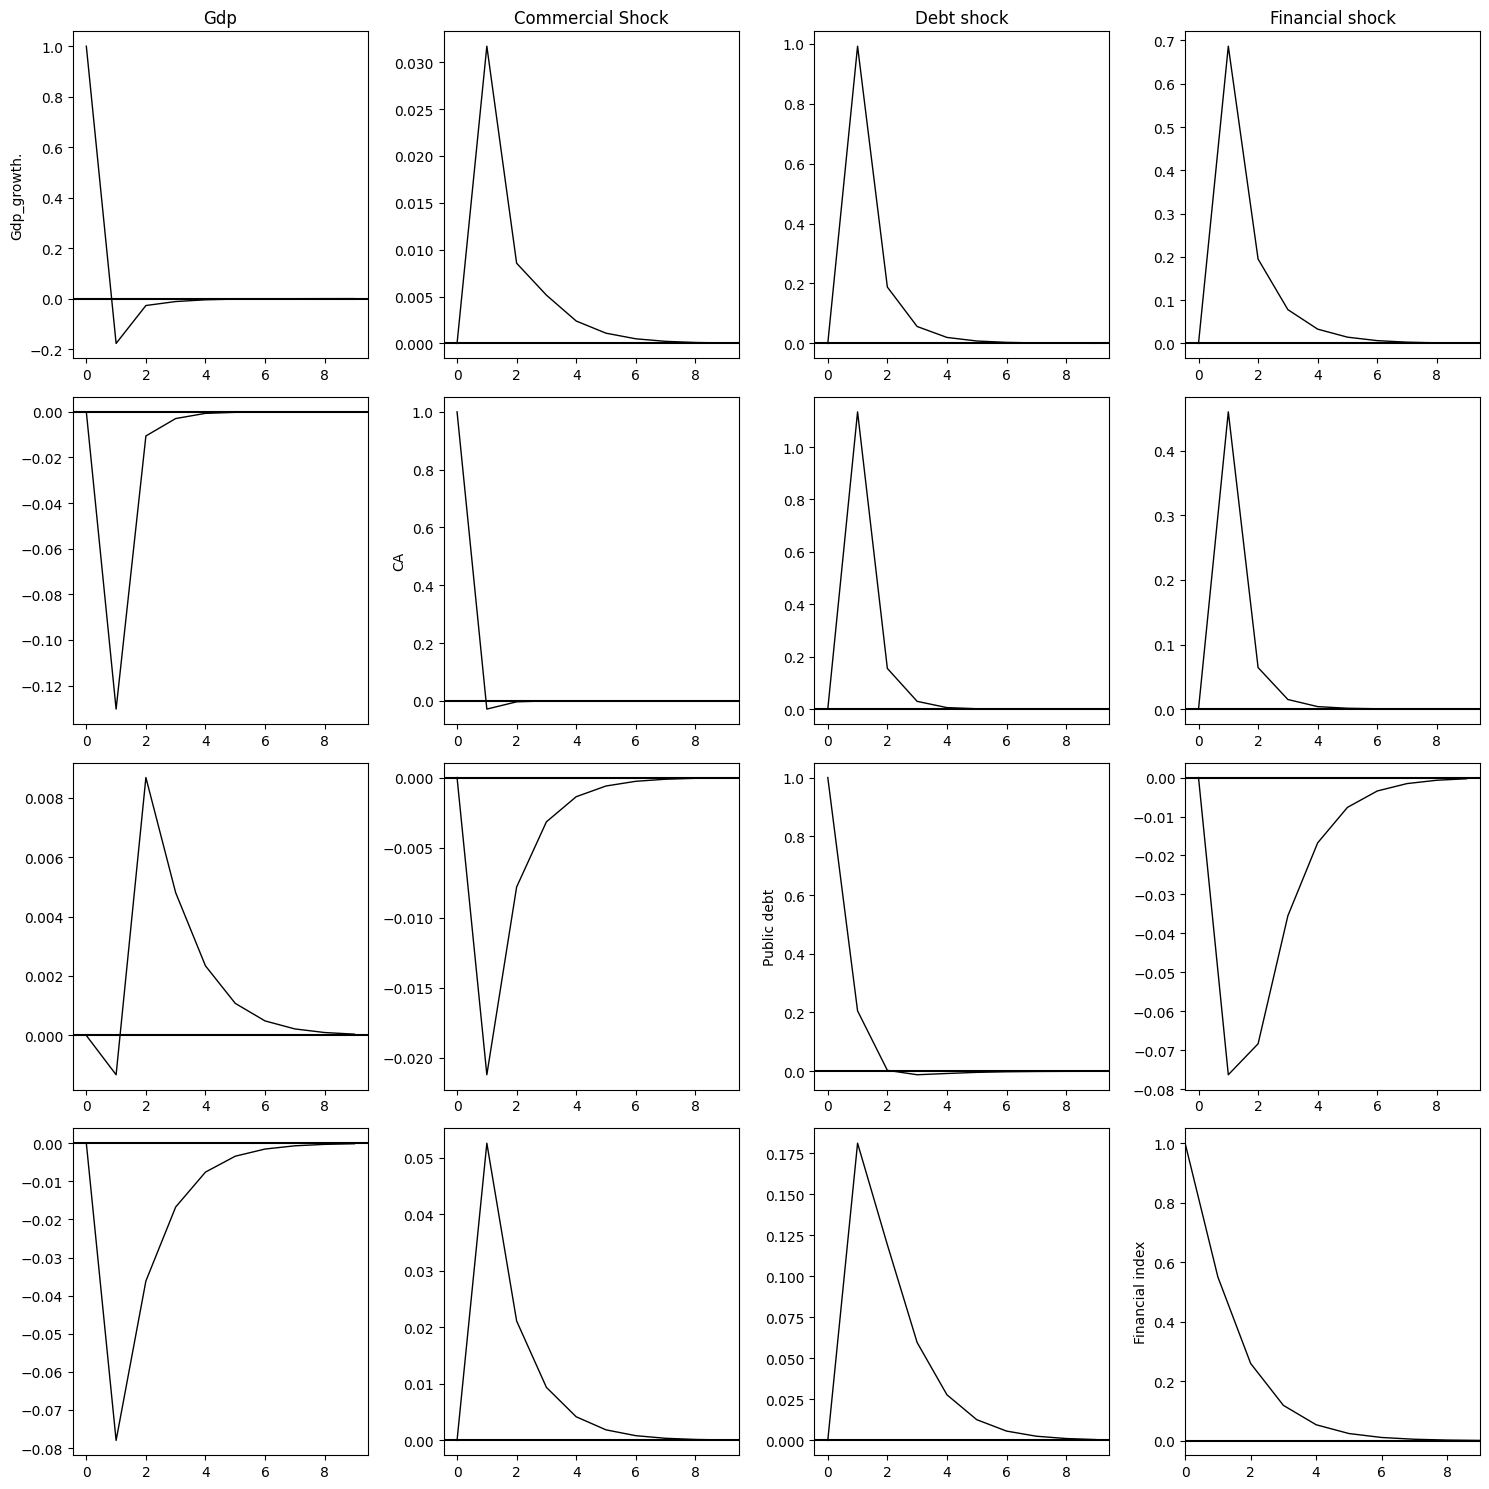

In [11]:
m = 4  #Considered Variable
p = 1 #Number of lags based on AIC criterion
c = 1  #Constant term
h = 10 #IRF horizon

T = len(jpn)
Y = jpn.iloc[p:, :] #Building a VAR(5) is not possible to consider first 5 observations

X_lagged  = pd.DataFrame()
for col in jpn.columns:
    for i in range(1, p+1):
        X_lagged[f'{col}_lag_{i}'] = jpn[col].shift(i)
X_lagged = X_lagged.iloc[p:,:]
X_lagged = X_lagged[[col for lag in sorted(set(int(re.search(r'_lag_(\d+)$', col).group(1)) 
                                               if re.search(r'_lag_(\d+)$', col) else 0 for col in X_lagged.columns)) 
                                               for col in [x for x in X_lagged.columns if re.search(fr'_lag_{lag}$', x)]] + 
                                               [x for x in X_lagged.columns if not re.search(r'_lag_\d+$', x)]]
X_lagged.insert(0, 'const', 1)


pi_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_lagged.T, X_lagged)), X_lagged.T), Y) 
Y_fit = np.dot(X_lagged, pi_hat)
err = Y - Y_fit

A_comp = np.block([
[pi_hat[1:, :].T],
[np.eye(m * p - m), np.zeros((m * p - m, m))]
])



PHI = np.zeros((m, m, h))
for j in range(h):
    PHI_comp = np.linalg.matrix_power(A_comp, j)
    PHI[:, :, j] = PHI_comp[:m, :m]






PHI_plot = np.reshape(np.transpose(PHI, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp_growth.', 'CA', 'Public debt','Financial index']
Shocknames = ['Gdp', 'Commercial Shock', 'Debt shock','Financial shock']

ylab = 0

fig, axes = plt.subplots(m, m, figsize=(15, 15))
axes_flat = axes.flatten()
for k in range(m*m): 
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_plot[:, k], linewidth=1, color='k')
    ax.axhline(0, color='k', linestyle='-')
    if k < 4: 
        ax.set_title(Shocknames[k]) 
    if k in [0, 5, 10,15]: 
        ax.set_ylabel(VARnames[ylab]) 
        ylab += 1
ax.set_xlim([0, h-1])
plt.tight_layout() 
plt.show()

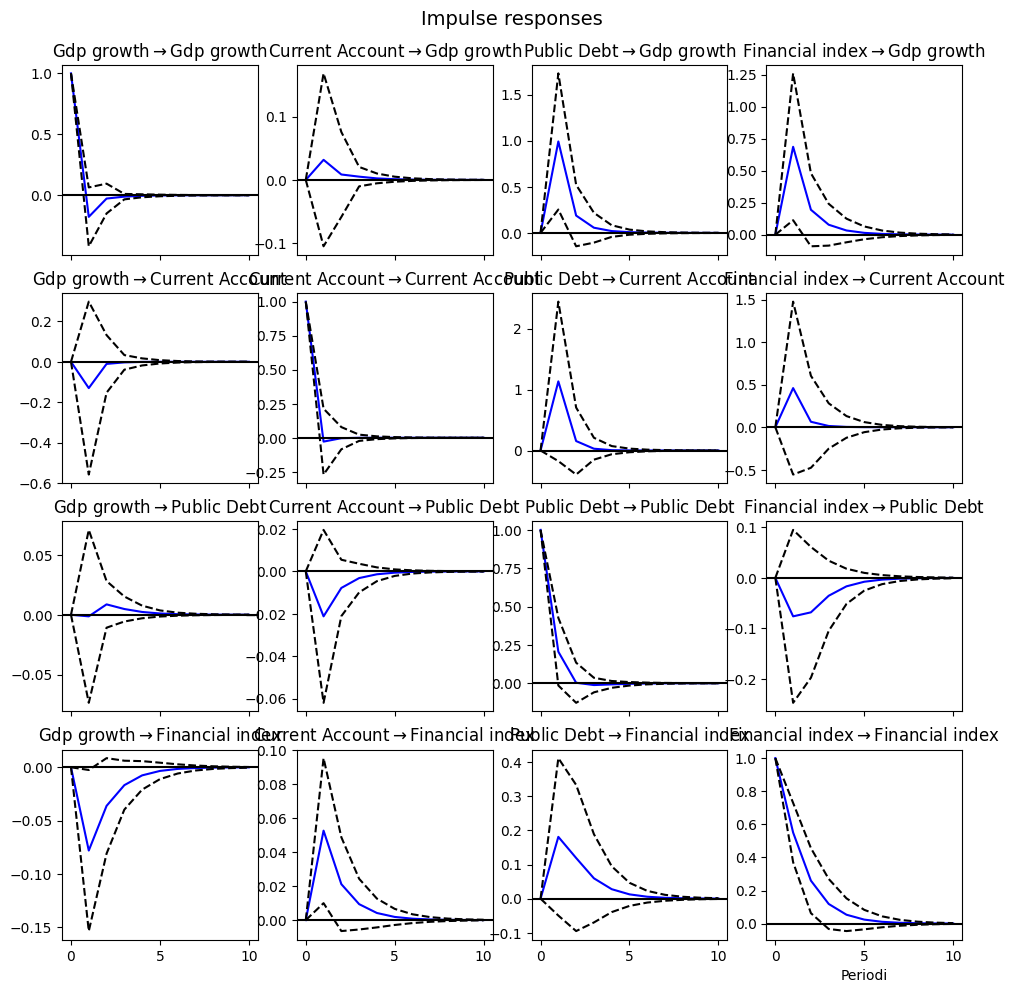

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 143.781, critical value: 173.004>, p-value: 0.489>


In [12]:
model = sm.tsa.VAR(jpn)

# Stima il modello con un ordine di 6
results = model.fit(1)
irf = results.irf(10)

irf.plot(orth=False)
plt.xlabel('Periodi')

plt.show()

whiteness_test_result = results.test_whiteness(nlags=10)
print(whiteness_test_result)

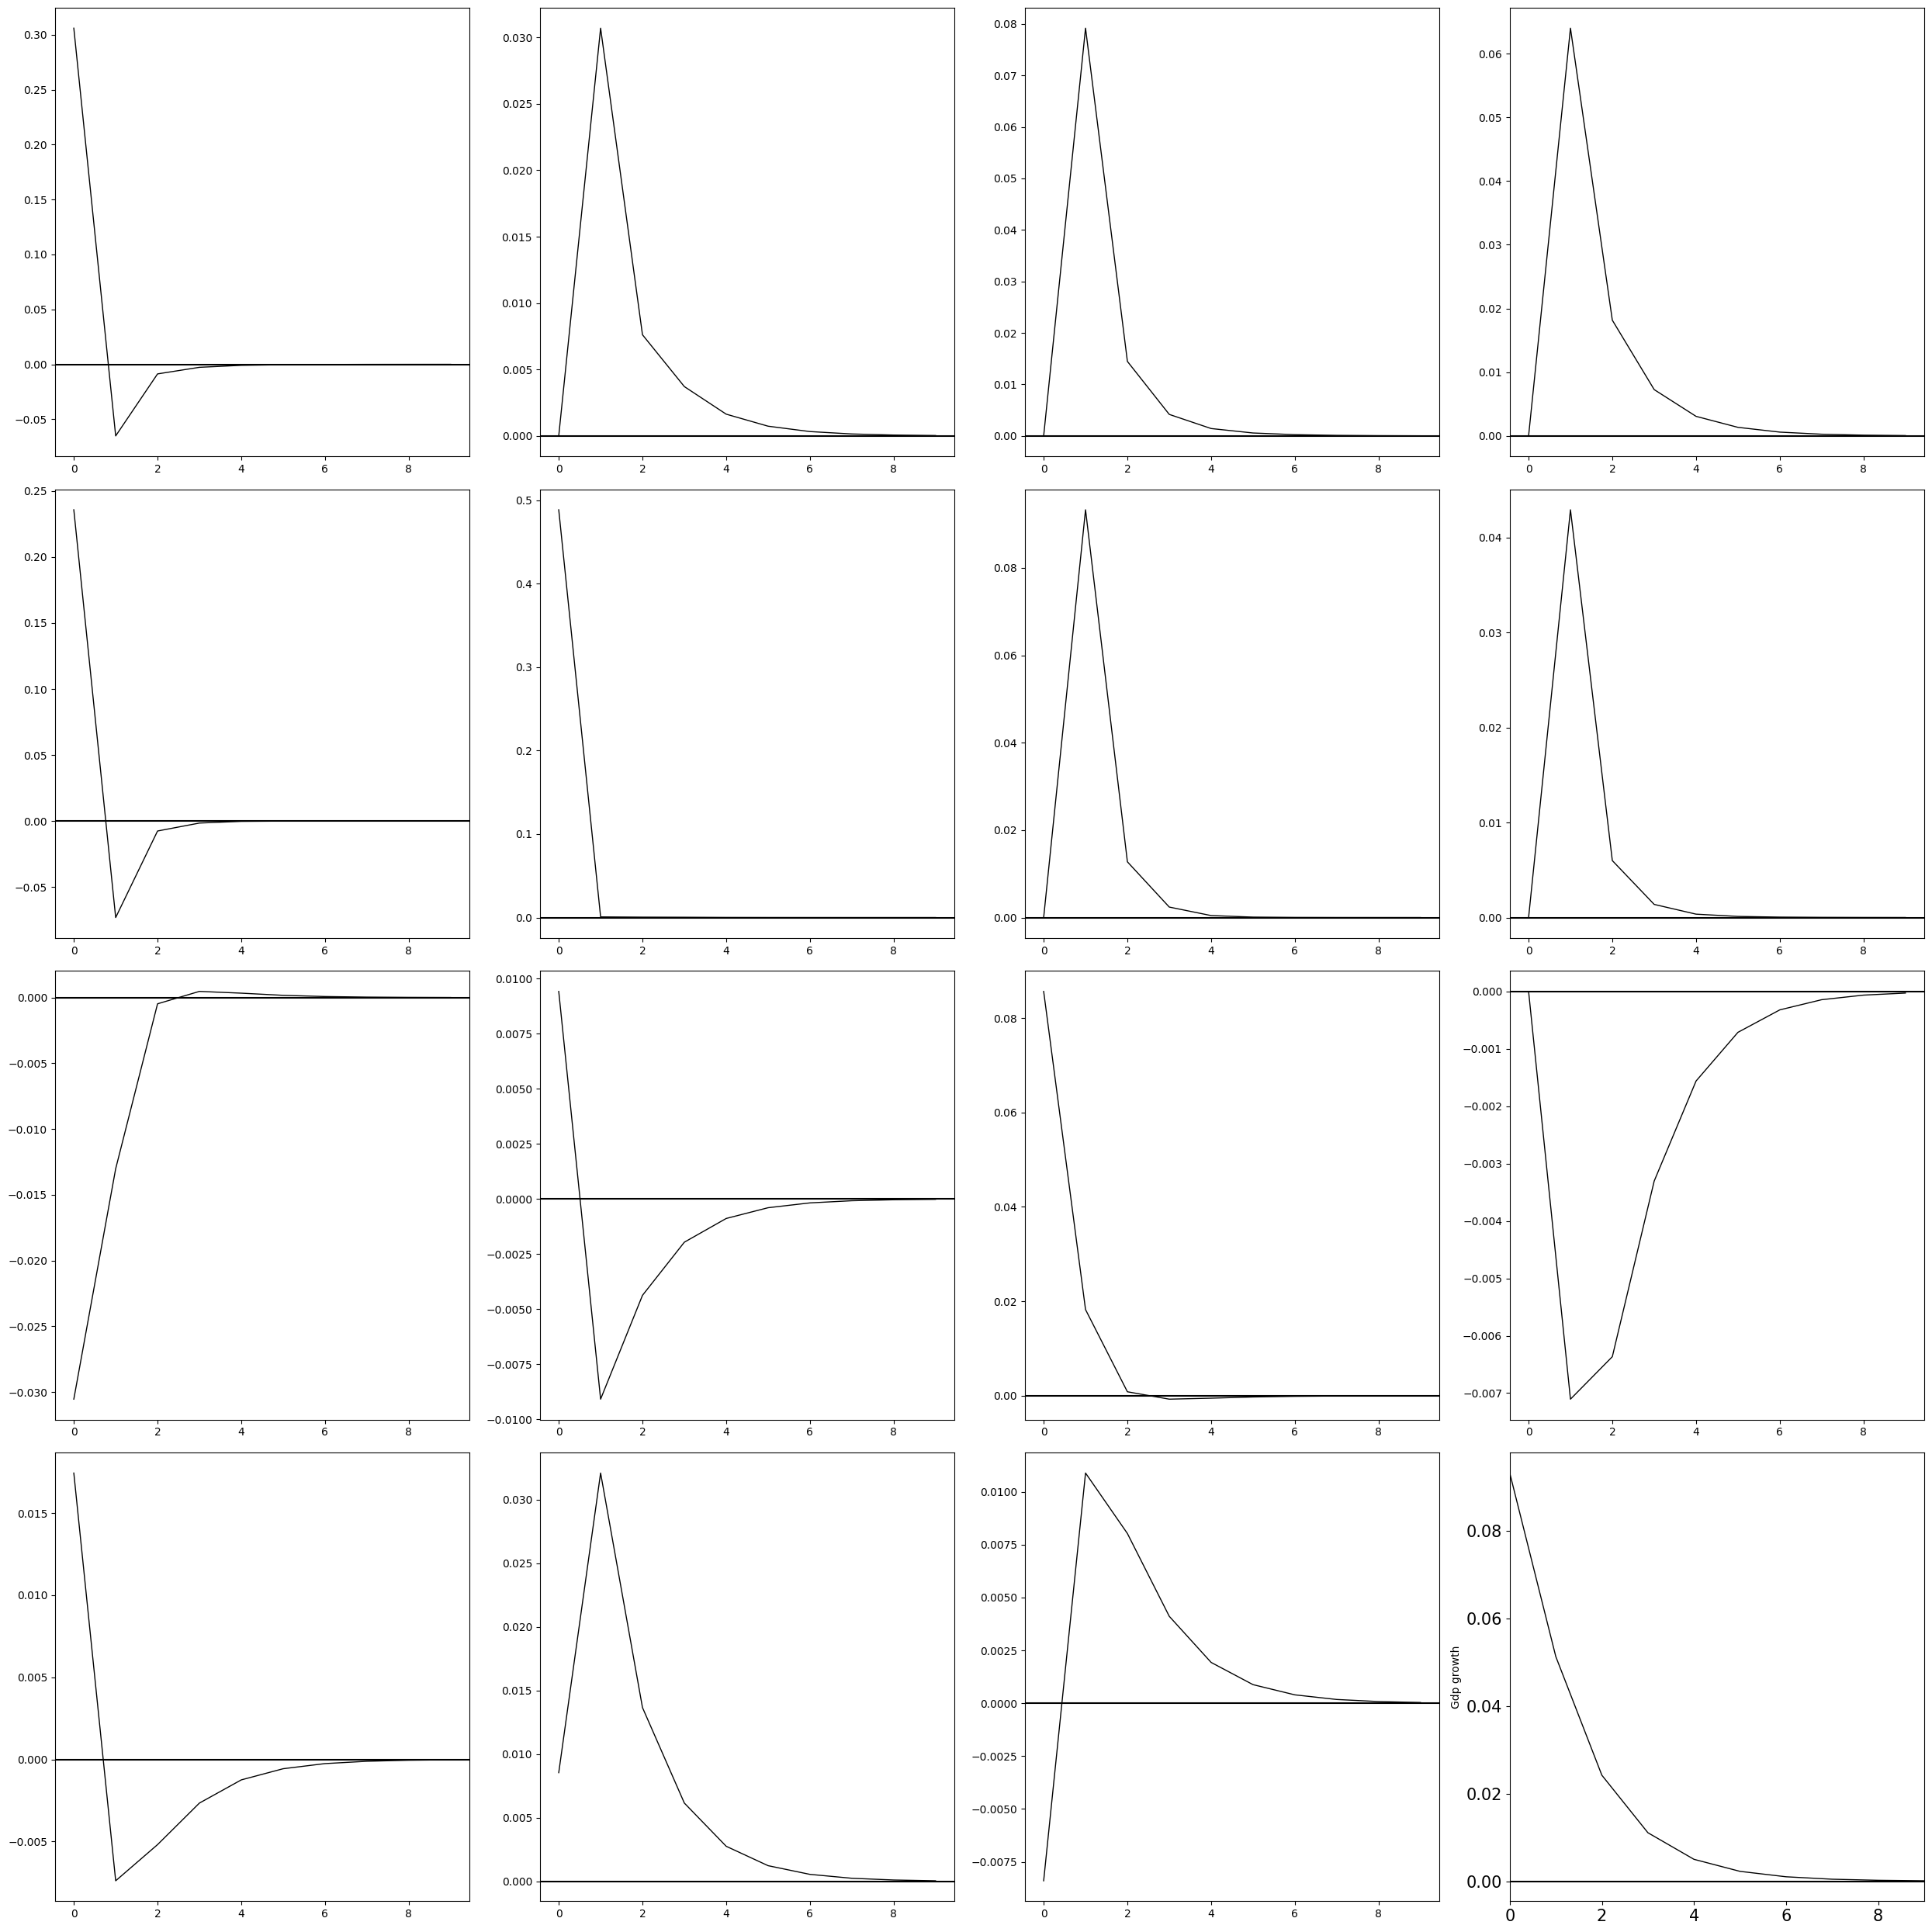

In [13]:
T = len(jpn) - m * p - m

omega = np.dot(err.T, err) / T

P = np.linalg.cholesky(omega)
PHI_SR = np.zeros((m, m, h))

for i in range(h):
    PHI_SR[:, :, i] = np.dot(PHI[:, :, i], P)
    
PHI_SR_plot = np.reshape(np.transpose(PHI_SR, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp growth', 'Current Account', 'Public Debt','Financil index'] 
Shocknames = ['Gdp shock', 'Commercial shock', 'Debt shock','Financial shock']
ylab = 0
# Create subplots
fig, axes = plt.subplots(m, m, figsize=(25, 25))
axes_flat = axes.flatten()
for k in range(m*m): 
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_SR_plot[:, k], linewidth=1, color='k')
    ax.axhline(0, color='k', linestyle='-')
if k < 4: 
    ax.set_title(Shocknames[k]) 
if k in [0, 5, 10, 15]: 
    ax.set_ylabel(VARnames[ylab]) 
    ylab += 1

ax.set_xlim([0, h-1]) 
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout() 
plt.show()

In [14]:
coefficents = pd.DataFrame(pi_hat)
coefficents.columns = ['Gdp growth','Current Account','Public Debt','Financial index']
coefficents.index = ['Const.','Gdp_l1','Ca_l1','Pd_l1','Fi_l1']
coefficents=coefficents.transpose()
coefficents

,Const.,Gdp_l1,Ca_l1,Pd_l1,Fi_l1
Gdp growth,-0.249591,-0.177610,0.031710,0.991818,0.686766
Current Account,-0.065333,-0.130303,-0.028331,1.134433,0.460345
Public Debt,0.031370,-0.001321,-0.021215,0.205563,-0.076243
Financial index,-0.018273,-0.077987,0.052604,0.181086,0.550280


In [15]:
sigma_hat = np.dot(err.T, err) / (T - p - 1)
X_lagged_inv = np.linalg.inv(np.dot(X_lagged.T, X_lagged))
var_cov_matrix = np.kron(sigma_hat, X_lagged_inv)
std_err = np.sqrt(np.diag(var_cov_matrix).reshape(pi_hat.shape))

# Create DataFrame for standard errors
std_err_df = pd.DataFrame(std_err, index=coefficents.columns, columns=[col + '_std' for col in coefficents.index])
std_err_df=std_err_df.transpose()

t_values = pi_hat / std_err
t_values_df = pd.DataFrame(t_values, index=coefficents.columns, columns=[col + '_t' for col in coefficents.index])


In [16]:
from scipy.stats import t
degrees_of_freedom = T - (m * p) - 1
p_values = 2 * (1 - t.cdf(np.abs(t_values), df=degrees_of_freedom))

# Create DataFrame for p-values
p_values_df = pd.DataFrame(p_values, index=coefficents.columns, columns=[col + '_p' for col in coefficents.index])
print("p-values DataFrame:")
p_values_df.transpose()

p-values DataFrame:


,Const.,Gdp_l1,Ca_l1,Pd_l1,Fi_l1
Gdp growth_p,4.003485e-08,0.555740,0.963177,0.000000e+00,0.000000e+00
Current Account_p,6.067545e-01,0.075633,0.957658,3.996803e-15,0.000000e+00
Public Debt_p,6.618375e-01,0.995311,0.085853,2.460817e-02,5.292189e-01
Financial index_p,9.623968e-01,0.539757,0.167544,0.000000e+00,1.097836e-07


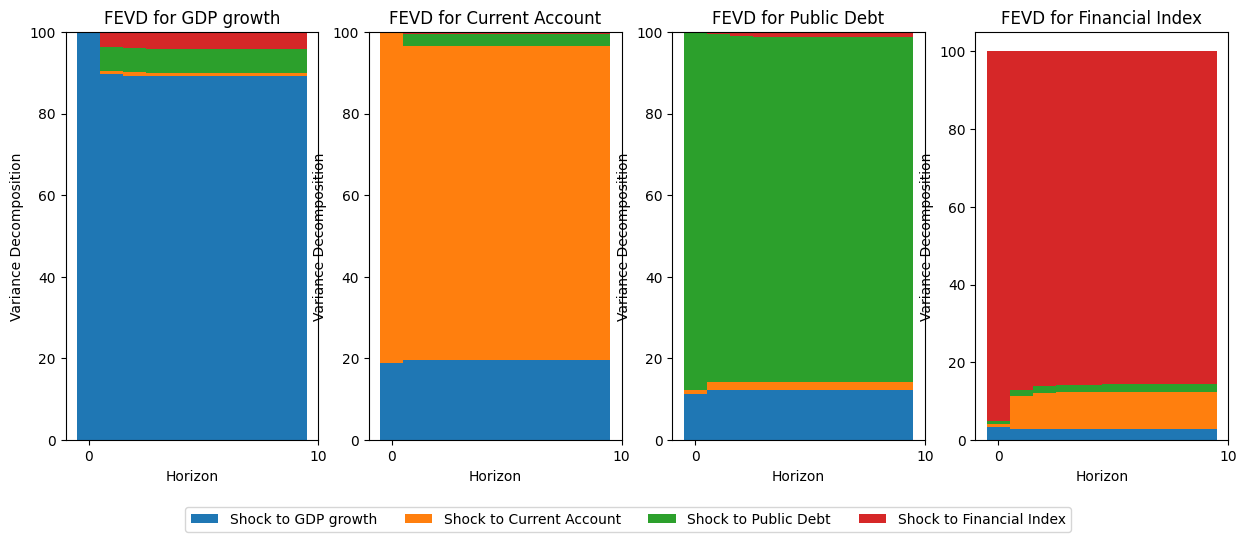

In [17]:
h = 10
MSE = np.zeros((m, m, h))
MSE_shock = np.zeros((m, m, h))
FEVD = np.zeros((h, m, m))

MSE[:, :, 0] = omega
for ii in range(m):
    for nn in range(1, h):
        MSE[:, :, nn] = MSE[:, :, nn - 1] + PHI[:, :, nn] @ omega @ PHI[:, :, nn].T
    MSE_shock[:, :, 0] = P[:, ii].reshape(-1, 1) @ P[:, ii].reshape(1, -1)

    for nn in range(1, h):
        MSE_shock[:, :, nn] = MSE_shock[:, :, nn - 1] + PHI[:, :, nn] @ MSE_shock[:, :, 0] @ PHI[:, :, nn].T
    FECD = MSE_shock[:, :, :] / MSE[:, :, :]

    for nn in range(h):
        for kk in range(m):
            FEVD[nn, ii, kk] = 100 * FECD[kk, kk, nn]

def plot_FEVD(FEVD_result, variable_names, horizon=40):
    """
    Plot FEVD results using stacked bar plots in subplots.
    FEVD_result: The FEVD matrix of shape (n, n, horizon)
    variable_names: List of names of the variables
    horizon: The number of periods ahead for the forecast
    """
    FEVD_result = FEVD_result.transpose((2, 1, 0))
    n = FEVD_result.shape[0]
    cols = 4
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6 * rows))
    fig.subplots_adjust(bottom=0.2, hspace=0.4)

    if rows == 1:
        axes = axes.flatten()
    for i in range(n):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        bottom_values = np.zeros(horizon)
        for j in range(n):
            ax.bar(np.arange(horizon), FEVD_result[i, j, :], bottom=bottom_values, width=1, label=f"Shock to {variable_names[j]}")
            bottom_values += FEVD_result[i, j, :]
        ax.set_title(f"FEVD for {variable_names[i]}")
        ax.set_xlabel("Horizon")
        ax.set_ylabel("Variance Decomposition")
        ax.set_xticks(np.linspace(0, horizon, int(horizon / 10) + 1, endpoint=True))

    for i in range(n, rows * cols):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        ax.axis('off')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=len(variable_names))

variable_names = ['GDP growth', 'Current Account', 'Public Debt', 'Financial Index']
plot_FEVD(FEVD, variable_names, h)


In [18]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(jpn[['Current Account', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2049  , p=0.6519  , df_denom=84, df_num=1
ssr based chi2 test:   chi2=0.2123  , p=0.6450  , df=1
likelihood ratio test: chi2=0.2120  , p=0.6452  , df=1
parameter F test:         F=0.2049  , p=0.6519  , df_denom=84, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8233  , p=0.4426  , df_denom=81, df_num=2
ssr based chi2 test:   chi2=1.7482  , p=0.4172  , df=2
likelihood ratio test: chi2=1.7307  , p=0.4209  , df=2
parameter F test:         F=0.8233  , p=0.4426  , df_denom=81, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6509  , p=0.5848  , df_denom=78, df_num=3
ssr based chi2 test:   chi2=2.1280  , p=0.5463  , df=3
likelihood ratio test: chi2=2.1018  , p=0.5516  , df=3
parameter F test:         F=0.6509  , p=0.5848  , df_denom=78, df_num=3


{1: ({'ssr_ftest': (0.20494472567611946, 0.651925961763957, 84.0, 1),
   'ssr_chi2test': (0.2122641801645523, 0.6449985215411307, 1),
   'lrtest': (0.21200565757686718, 0.6451999115819831, 1),
   'params_ftest': (0.20494472567612174, 0.6519259617639422, 84.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.8232803147990071, 0.4426286025193269, 81.0, 2),
   'ssr_chi2test': (1.7482001746349285, 0.4172373279438901, 2),
   'lrtest': (1.7306687344501768, 0.4209107903225122, 2),
   'params_ftest': (0.8232803147990119, 0.4426286025193228, 81.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6509053414337337, 0.5847536539048573, 78.0, 3),
   'ssr_chi2test': (2.127959770071821, 0.5462770539974915, 3),
   'lrtest': (2.101759601692777, 0.5515568659646466, 3),
   'params_ftest': (0.6509053414337319, 0.5847536539048573, 78.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.

In [19]:
grangercausalitytests(jpn[['Public Debt', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2764  , p=0.2618  , df_denom=84, df_num=1
ssr based chi2 test:   chi2=1.3220  , p=0.2502  , df=1
likelihood ratio test: chi2=1.3121  , p=0.2520  , df=1
parameter F test:         F=1.2764  , p=0.2618  , df_denom=84, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8751  , p=0.0622  , df_denom=81, df_num=2
ssr based chi2 test:   chi2=6.1051  , p=0.0472  , df=2
likelihood ratio test: chi2=5.8981  , p=0.0524  , df=2
parameter F test:         F=2.8751  , p=0.0622  , df_denom=81, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0864  , p=0.1088  , df_denom=78, df_num=3
ssr based chi2 test:   chi2=6.8210  , p=0.0778  , df=3
likelihood ratio test: chi2=6.5612  , p=0.0873  , df=3
parameter F test:         F=2.0864  , p=0.1088  , df_denom=78, df_num=3


{1: ({'ssr_ftest': (1.276418473428923, 0.2617818906460056, 84.0, 1),
   'ssr_chi2test': (1.322004847479956, 0.25023255999954236, 1),
   'lrtest': (1.312061218368001, 0.25202179942815706, 1),
   'params_ftest': (1.2764184734289323, 0.26178189064599916, 84.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.875068378974677, 0.062187264882223744, 81.0, 2),
   'ssr_chi2test': (6.105083471403018, 0.04723870337198231, 2),
   'lrtest': (5.898124292786747, 0.052388815955825035, 2),
   'params_ftest': (2.8750683789746683, 0.06218726488222405, 81.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.0864309163293178, 0.10877643757571678, 78.0, 3),
   'ssr_chi2test': (6.821024149538153, 0.07782649214905295, 3),
   'lrtest': (6.561153072883201, 0.08728172667302975, 3),
   'params_ftest': (2.0864309163293213, 0.1087764375757159, 78.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

In [20]:
grangercausalitytests(jpn[['Gdp growth', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1390  , p=0.0451  , df_denom=84, df_num=1
ssr based chi2 test:   chi2=4.2868  , p=0.0384  , df=1
likelihood ratio test: chi2=4.1846  , p=0.0408  , df=1
parameter F test:         F=4.1390  , p=0.0451  , df_denom=84, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0259  , p=0.1385  , df_denom=81, df_num=2
ssr based chi2 test:   chi2=4.3019  , p=0.1164  , df=2
likelihood ratio test: chi2=4.1978  , p=0.1226  , df=2
parameter F test:         F=2.0259  , p=0.1385  , df_denom=81, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6723  , p=0.1798  , df_denom=78, df_num=3
ssr based chi2 test:   chi2=5.4672  , p=0.1406  , df=3
likelihood ratio test: chi2=5.2985  , p=0.1512  , df=3
parameter F test:         F=1.6723  , p=0.1798  , df_denom=78, df_num=3


{1: ({'ssr_ftest': (4.13901335937951, 0.045060056899620025, 84.0, 1),
   'ssr_chi2test': (4.286835265071637, 0.03840859558469425, 1),
   'lrtest': (4.184566584743408, 0.04079364219893067, 1),
   'params_ftest': (4.139013359379546, 0.0450600568996192, 84.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.025891559044358, 0.1385047381025834, 81.0, 2),
   'ssr_chi2test': (4.301893187106538, 0.11637394679142261, 2),
   'lrtest': (4.197757135010136, 0.12259383190089596, 2),
   'params_ftest': (2.0258915590443514, 0.13850473810258532, 81.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.6723116474669213, 0.17979949096363165, 78.0, 3),
   'ssr_chi2test': (5.467172693641857, 0.14061529091154237, 3),
   'lrtest': (5.298542638343378, 0.15119698504440934, 3),
   'params_ftest': (1.6723116474669248, 0.17979949096363018, 78.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0

In [21]:
grangercausalitytests(jpn[['Financial index', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8009  , p=0.0979  , df_denom=84, df_num=1
ssr based chi2 test:   chi2=2.9010  , p=0.0885  , df=1
likelihood ratio test: chi2=2.8536  , p=0.0912  , df=1
parameter F test:         F=2.8009  , p=0.0979  , df_denom=84, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0505  , p=0.0528  , df_denom=81, df_num=2
ssr based chi2 test:   chi2=6.4775  , p=0.0392  , df=2
likelihood ratio test: chi2=6.2452  , p=0.0440  , df=2
parameter F test:         F=3.0505  , p=0.0528  , df_denom=81, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.2554  , p=0.0007  , df_denom=78, df_num=3
ssr based chi2 test:   chi2=20.4503 , p=0.0001  , df=3
likelihood ratio test: chi2=18.3251 , p=0.0004  , df=3
parameter F test:         F=6.2554  , p=0.0007  , df_denom=78, df_num=3


{1: ({'ssr_ftest': (2.8009191735819585, 0.09793042104291977, 84.0, 1),
   'ssr_chi2test': (2.9009520012098853, 0.08852725488147074, 1),
   'lrtest': (2.853635872215591, 0.0911675444290286, 1),
   'params_ftest': (2.800919173581948, 0.09793042104292084, 84.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.050457987411684, 0.05281083281766486, 81.0, 2),
   'ssr_chi2test': (6.477515726355675, 0.03921257224076525, 2),
   'lrtest': (6.245169112071153, 0.04404318909995698, 2),
   'params_ftest': (3.050457987411681, 0.05281083281766486, 81.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (6.255400676489938, 0.0007336014949257907, 78.0, 3),
   'ssr_chi2test': (20.450348365447873, 0.00013690356351364608, 3),
   'lrtest': (18.32506109313323, 0.000376907197237122, 3),
   'params_ftest': (6.255400676489927, 0.0007336014949258028, 78.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [22]:
grangercausalitytests(jpn[['Public Debt', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8552  , p=0.1768  , df_denom=84, df_num=1
ssr based chi2 test:   chi2=1.9215  , p=0.1657  , df=1
likelihood ratio test: chi2=1.9005  , p=0.1680  , df=1
parameter F test:         F=1.8552  , p=0.1768  , df_denom=84, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8583  , p=0.1625  , df_denom=81, df_num=2
ssr based chi2 test:   chi2=3.9461  , p=0.1390  , df=2
likelihood ratio test: chi2=3.8582  , p=0.1453  , df=2
parameter F test:         F=1.8583  , p=0.1625  , df_denom=81, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9072  , p=0.1353  , df_denom=78, df_num=3
ssr based chi2 test:   chi2=6.2352  , p=0.1007  , df=3
likelihood ratio test: chi2=6.0171  , p=0.1108  , df=3
parameter F test:         F=1.9072  , p=0.1353  , df_denom=78, df_num=3


{1: ({'ssr_ftest': (1.8552015590057465, 0.17682109913435548, 84.0, 1),
   'ssr_chi2test': (1.921458757541666, 0.16569593697186902, 1),
   'lrtest': (1.9005476760988245, 0.16801702946948593, 1),
   'params_ftest': (1.8552015590057558, 0.17682109913435548, 84.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.8583308839621435, 0.16251950064262957, 81.0, 2),
   'ssr_chi2test': (3.9460853338455397, 0.13903318033065123, 2),
   'lrtest': (3.8582302745520565, 0.14527669155489412, 2),
   'params_ftest': (1.8583308839621497, 0.16251950064262957, 81.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.9072259126420317, 0.13529523847265149, 78.0, 3),
   'ssr_chi2test': (6.235161637483564, 0.10071309136790134, 3),
   'lrtest': (6.01707439738982, 0.11078246707631838, 3),
   'params_ftest': (1.9072259126420406, 0.13529523847265063, 78.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

In [23]:
grangercausalitytests(jpn[['Gdp growth', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7974  , p=0.3744  , df_denom=84, df_num=1
ssr based chi2 test:   chi2=0.8258  , p=0.3635  , df=1
likelihood ratio test: chi2=0.8220  , p=0.3646  , df=1
parameter F test:         F=0.7974  , p=0.3744  , df_denom=84, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6343  , p=0.5329  , df_denom=81, df_num=2
ssr based chi2 test:   chi2=1.3468  , p=0.5100  , df=2
likelihood ratio test: chi2=1.3364  , p=0.5126  , df=2
parameter F test:         F=0.6343  , p=0.5329  , df_denom=81, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1994  , p=0.0279  , df_denom=78, df_num=3
ssr based chi2 test:   chi2=10.4597 , p=0.0150  , df=3
likelihood ratio test: chi2=9.8645  , p=0.0198  , df=3
parameter F test:         F=3.1994  , p=0.0279  , df_denom=78, df_num=3


{1: ({'ssr_ftest': (0.7973719249944657, 0.37443138797292497, 84.0, 1),
   'ssr_chi2test': (0.8258494937442681, 0.36347544344766847, 1),
   'lrtest': (0.8219544260672933, 0.3646093566371552, 1),
   'params_ftest': (0.7973719249944765, 0.3744313879729193, 84.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6342612857824679, 0.532940215922716, 81.0, 2),
   'ssr_chi2test': (1.3468264340072158, 0.5099649826949038, 2),
   'lrtest': (1.3363890930017135, 0.5126332783295803, 2),
   'params_ftest': (0.6342612857824697, 0.5329402159227112, 81.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.199446070592409, 0.02787234070624069, 78.0, 3),
   'ssr_chi2test': (10.459727538475182, 0.015036591850030935, 3),
   'lrtest': (9.864522075448207, 0.019753557354543833, 3),
   'params_ftest': (3.1994460705924133, 0.027872340706240503, 78.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [24]:
grangercausalitytests(jpn[['Financial index', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4684  , p=0.0375  , df_denom=84, df_num=1
ssr based chi2 test:   chi2=4.6280  , p=0.0315  , df=1
likelihood ratio test: chi2=4.5091  , p=0.0337  , df=1
parameter F test:         F=4.4684  , p=0.0375  , df_denom=84, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6344  , p=0.0779  , df_denom=81, df_num=2
ssr based chi2 test:   chi2=5.5941  , p=0.0610  , df=2
likelihood ratio test: chi2=5.4197  , p=0.0665  , df=2
parameter F test:         F=2.6344  , p=0.0779  , df_denom=81, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4371  , p=0.0709  , df_denom=78, df_num=3
ssr based chi2 test:   chi2=7.9675  , p=0.0467  , df=3
likelihood ratio test: chi2=7.6159  , p=0.0547  , df=3
parameter F test:         F=2.4371  , p=0.0709  , df_denom=78, df_num=3


{1: ({'ssr_ftest': (4.468400713293434, 0.037492903851754404, 84.0, 1),
   'ssr_chi2test': (4.627986453053913, 0.031454457636938896, 1),
   'lrtest': (4.509091273231661, 0.03371514850059314, 1),
   'params_ftest': (4.468400713293421, 0.03749290385175483, 84.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.634424306433281, 0.07790336066857702, 81.0, 2),
   'ssr_chi2test': (5.594086181562029, 0.06099013856289669, 2),
   'lrtest': (5.419669432494061, 0.06654780507704156, 2),
   'params_ftest': (2.634424306433271, 0.07790336066857775, 81.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.4371153569062365, 0.0708558549278554, 78.0, 3),
   'ssr_chi2test': (7.9674925129626955, 0.04668833664460064, 3),
   'lrtest': (7.615883778413831, 0.0546544836869749, 3),
   'params_ftest': (2.437115356906227, 0.07085585492785614, 78.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 

In [25]:
grangercausalitytests(jpn[['Current Account', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2906  , p=0.0732  , df_denom=84, df_num=1
ssr based chi2 test:   chi2=3.4081  , p=0.0649  , df=1
likelihood ratio test: chi2=3.3431  , p=0.0675  , df=1
parameter F test:         F=3.2906  , p=0.0732  , df_denom=84, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5934  , p=0.0810  , df_denom=81, df_num=2
ssr based chi2 test:   chi2=5.5071  , p=0.0637  , df=2
likelihood ratio test: chi2=5.3379  , p=0.0693  , df=2
parameter F test:         F=2.5934  , p=0.0810  , df_denom=81, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7881  , p=0.1563  , df_denom=78, df_num=3
ssr based chi2 test:   chi2=5.8459  , p=0.1194  , df=3
likelihood ratio test: chi2=5.6536  , p=0.1297  , df=3
parameter F test:         F=1.7881  , p=0.1563  , df_denom=78, df_num=3


{1: ({'ssr_ftest': (3.2906010522412013, 0.07324812194741802, 84.0, 1),
   'ssr_chi2test': (3.4081225183926724, 0.06487621996375824, 1),
   'lrtest': (3.343061614970651, 0.06748892396000722, 1),
   'params_ftest': (3.290601052241208, 0.07324812194741748, 84.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.5934461438307124, 0.08096061580639058, 81.0, 2),
   'ssr_chi2test': (5.507070823936821, 0.0637022489322467, 2),
   'lrtest': (5.337929683368429, 0.06932394944277348, 2),
   'params_ftest': (2.593446143830718, 0.0809606158063898, 81.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.7881443347801877, 0.15631793294391352, 78.0, 3),
   'ssr_chi2test': (5.845856479089077, 0.11935527418635336, 3),
   'lrtest': (5.65359895958602, 0.12973494335856123, 3),
   'params_ftest': (1.7881443347801917, 0.15631793294391352, 78.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 

In [26]:
grangercausalitytests(jpn[['Gdp growth', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1


ssr based F test:         F=5.9246  , p=0.0171  , df_denom=84, df_num=1
ssr based chi2 test:   chi2=6.1362  , p=0.0132  , df=1
likelihood ratio test: chi2=5.9294  , p=0.0149  , df=1
parameter F test:         F=5.9246  , p=0.0171  , df_denom=84, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5336  , p=0.0338  , df_denom=81, df_num=2
ssr based chi2 test:   chi2=7.5035  , p=0.0235  , df=2
likelihood ratio test: chi2=7.1940  , p=0.0274  , df=2
parameter F test:         F=3.5336  , p=0.0338  , df_denom=81, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7295  , p=0.1678  , df_denom=78, df_num=3
ssr based chi2 test:   chi2=5.6541  , p=0.1297  , df=3
likelihood ratio test: chi2=5.4740  , p=0.1402  , df=3
parameter F test:         F=1.7295  , p=0.1678  , df_denom=78, df_num=3


{1: ({'ssr_ftest': (5.924566633568286, 0.017050331819229745, 84.0, 1),
   'ssr_chi2test': (6.136158299052868, 0.01324447555878918, 1),
   'lrtest': (5.929430322952385, 0.014890054668346815, 1),
   'params_ftest': (5.924566633568299, 0.01705033181922964, 84.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.5336236459208394, 0.033779963752283475, 81.0, 2),
   'ssr_chi2test': (7.503497124671412, 0.023476659542842785, 2),
   'lrtest': (7.194032590034169, 0.02740537011982171, 2),
   'params_ftest': (3.5336236459208403, 0.033779963752283475, 81.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.7294925602380526, 0.16780963395385315, 78.0, 3),
   'ssr_chi2test': (5.654110293085941, 0.12970623107735021, 3),
   'lrtest': (5.474001881265309, 0.1402018882414634, 3),
   'params_ftest': (1.7294925602380549, 0.16780963395385315, 78.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.